In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.style as st
st.use("ggplot")

In [98]:
df=pd.read_csv("newJordan.csv",usecols=["phone","religion","birthday","first","gender","lang"])

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
df.groupby("gender")["gender"].count()

gender
female     977629
male      2053413
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender'>

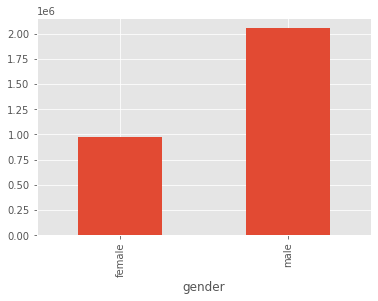

In [101]:
df.groupby("gender")["gender"].count().plot(kind="bar")

In [102]:
df.phone=df.phone.astype(str)

In [103]:
df.phone.count()

3099839

counting each phone carrier in jordan

In [104]:
Orange=df[df.phone.str.startswith("96277")].phone.count()
Zain=df[df.phone.str.startswith("96279")].phone.count()
Umniah=df[df.phone.str.startswith("96278")].phone.count()

there are 45 wrong phone number

In [105]:
df[~df.phone.str.startswith(tuple(["96277","96279","96278"]))].phone.count()


45

and there are 3099794 correct phone number

In [106]:
Orange+Umniah+Zain

3099794

a pie chart of the three phone carriers in jordan

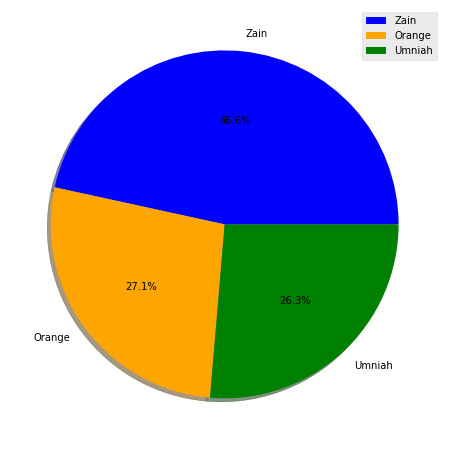

In [107]:
plt.gcf().set_size_inches(8,8)
plt.pie([Zain,Umniah,Orange],labels=["Zain","Orange","Umniah"],colors=["blue","orange","green"],shadow=True,autopct="%1.1f%%")
plt.legend()

there are 11667 unique religion valuea, not unique really, just the spelling or the languge used

In [108]:
df.religion.value_counts()

الاسلام                                                                                                 6531
Muslim                                                                                                  5257
Muslim - Sunni                                                                                          4168
Islam                                                                                                   4113
مسلم                                                                                                    3580
                                                                                                        ... 
Muslim and proud (Live Free Or Die Hard)                                                                   1
مسلم سني وألي الفخر                                                                                        1
moslem (i hane nothig .........................shiet i dont need any person on my life                     1
الاسلام (أشهد ان لا

In [109]:
df=df.replace({"religion":[".*(سن|Islam|isl|Musulman|sl|Ислам|SL|Sl|سل|مح|محم).*"]},"Muslim",regex=True)

In [110]:
df=df.replace({"religion":[".*(Христианство|sih|seh|cristian|atholic|ch|CH|Ch|مسي).*"]},"Christian",regex=True)

In [111]:
df=df.replace({"religion":[".*(God|god|GOD|Other|other).*"]},"Other",regex=True)

In [112]:
df=df.replace({"religion":[".*(الله|م|ﺍﻟ|isalam|ﺍﻟﻠﻪ|Isalm|allah|ﻣﺴﻠﻢ|Allah|isalm|لل|الا).*"]},"Muslim",regex=True)

In [113]:
df=df.replace({"religion":[".*(indu|udd).*"]},"Hindu & Buddhist",regex=True)

In [114]:
df=df.replace({"religion":[".*(uman|UMAN).*"]},"Humanism",regex=True)

In [115]:
df=df.replace({"religion":[".*(ruze|urzi).*"]},"Druze",regex=True)

In [116]:
df=df.replace({"religion":[".*(ecular|gnostic|Ath|None|none|أدري|no|No|NON|non|NO).*"]},"Non believer",regex=True)

the below script shows that the unique values have reduced from 11667 to 421 with around 400 contributing to 1.5% of total records. 
these 1.5% are different spelling, languages and phrases.

In [117]:
df.religion.value_counts()

Muslim          55743
Christian        1751
Other             593
Non believer      140
Humanism           28
                ...  
durze ()            1
Memes ()            1
00                  1
Neutral ()          1
Metal \m/           1
Name: religion, Length: 424, dtype: int64

In [118]:
df.religion.value_counts(normalize=True)[:10]*100

Muslim                              94.852641
Christian                            2.979513
Other                                1.009053
Non believer                         0.238225
Humanism                             0.047645
Hindu & Buddhist                     0.035734
Druze                                0.030629
What are your religious beliefs?     0.010210
ا                                    0.010210
musilm ()                            0.006806
Name: religion, dtype: float64

<AxesSubplot:>

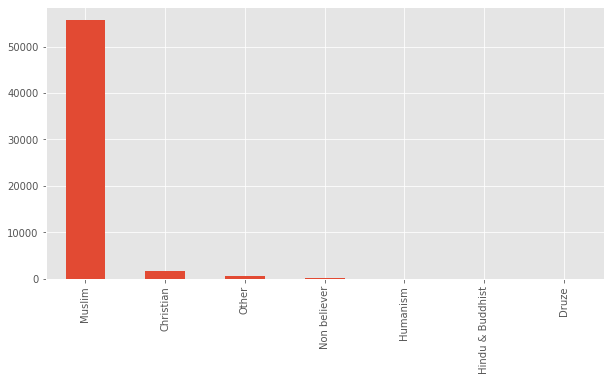

In [119]:
df[df.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar")

logarithmic scale, graph could be deceiving, islam has 94.853% of the not nan religion values

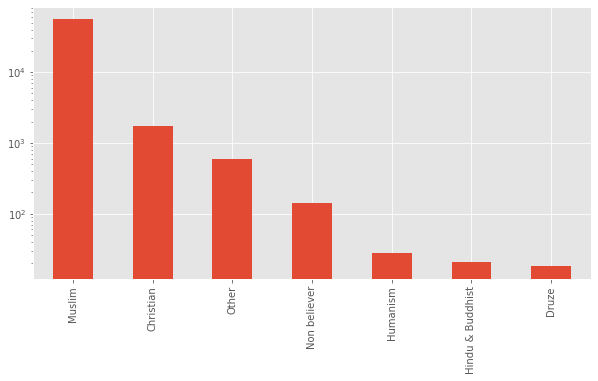

In [120]:
df[df.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar")
plt.yscale("log")

<AxesSubplot:>

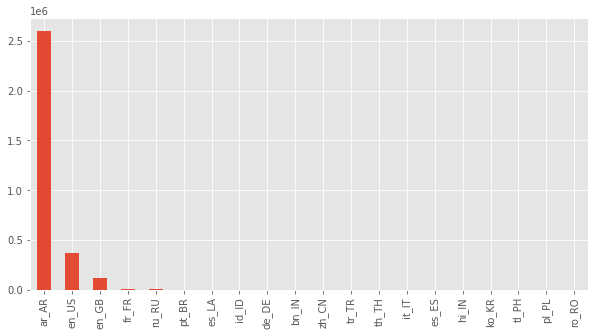

In [121]:
df["lang"].value_counts()[0:20].plot(figsize=(10,5),kind="bar")


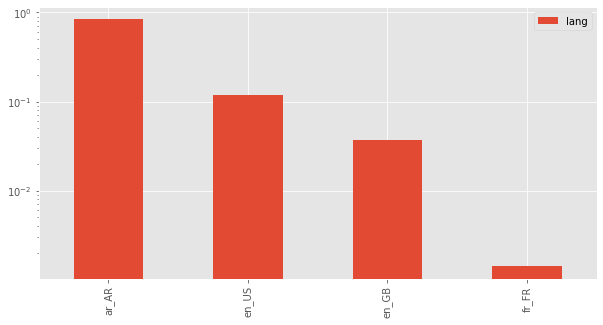

In [122]:
df["lang"].value_counts(normalize=True)[0:4].plot(figsize=(10,5),kind="bar")
plt.legend()
plt.yscale("log")

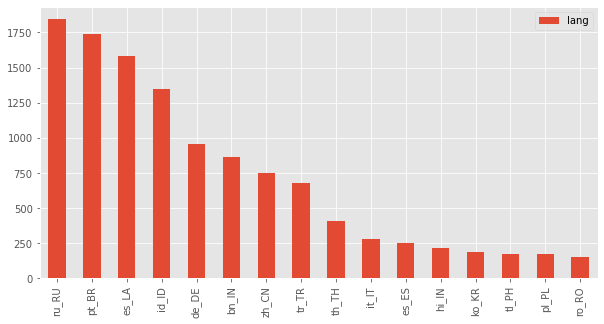

In [123]:
df["lang"].value_counts()[4:20].plot(figsize=(10,5),kind="bar")
plt.legend()


top 20 most common names as they are without cleaning, mohamed for example appeared 3 times in top 20, two times written in different ways in english and once in arabic. and some are not considered first names more like part of a nickname in arabic fathers are called with "father of eldest son name" in the data first name is roughly translated "father of" ... "mother of" is in top 20 also

<AxesSubplot:ylabel='first'>

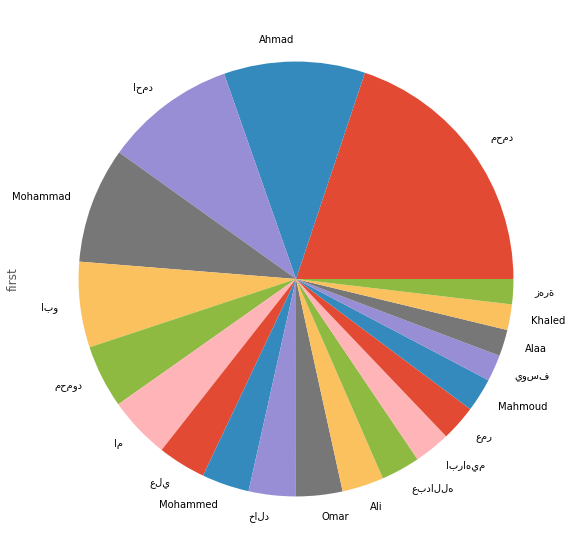

In [124]:
df["first"].value_counts()[:20].plot(figsize=(10,10),kind="pie")
# df.religion.value_counts()

In [135]:
dateSeries=df.birthday.dropna()

strings without year were suffexed by the year 2020 because there is a leap year date "02/29"

In [160]:
one=dateSeries[~dateSeries.str.contains(r"\d\d\d")]+"/2020"

In [161]:
two=dateSeries[dateSeries.str.contains(r"\d\d\d")]

concatenate the modified dates with the ones with year

In [162]:
dates=pd.concat([two,one],axis=0)

In [163]:
dates=pd.to_datetime(dates)

<AxesSubplot:>

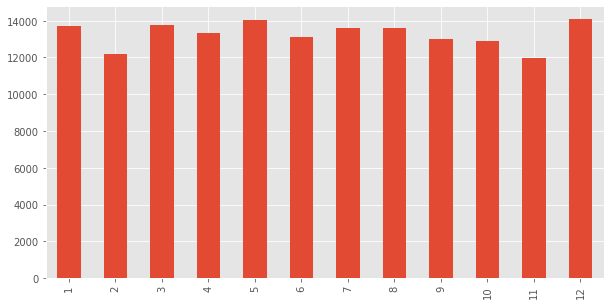

In [164]:
dates.dt.month.value_counts().sort_index().plot(figsize=(10,5),kind="bar")

<AxesSubplot:>

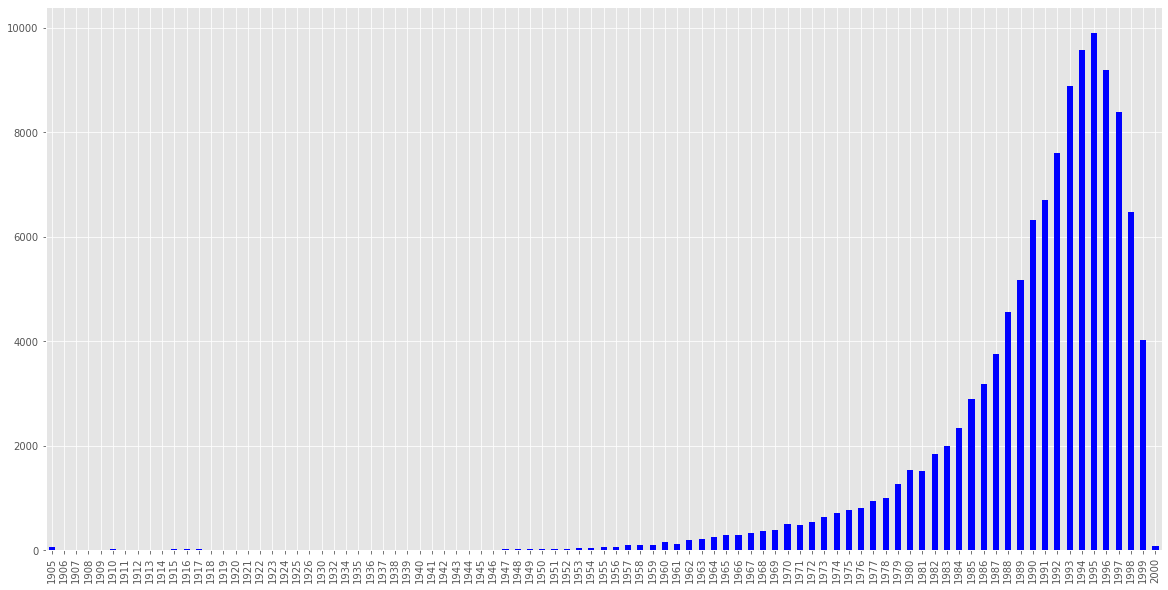

In [157]:
dates.dt.year.value_counts()[1:].sort_index().plot(figsize=(20,10),kind="bar",color="b")

In [200]:
dat=dates.dt.month.groupby(dates.dt.day).value_counts().unstack()

<AxesSubplot:xlabel='birthday', ylabel='birthday'>

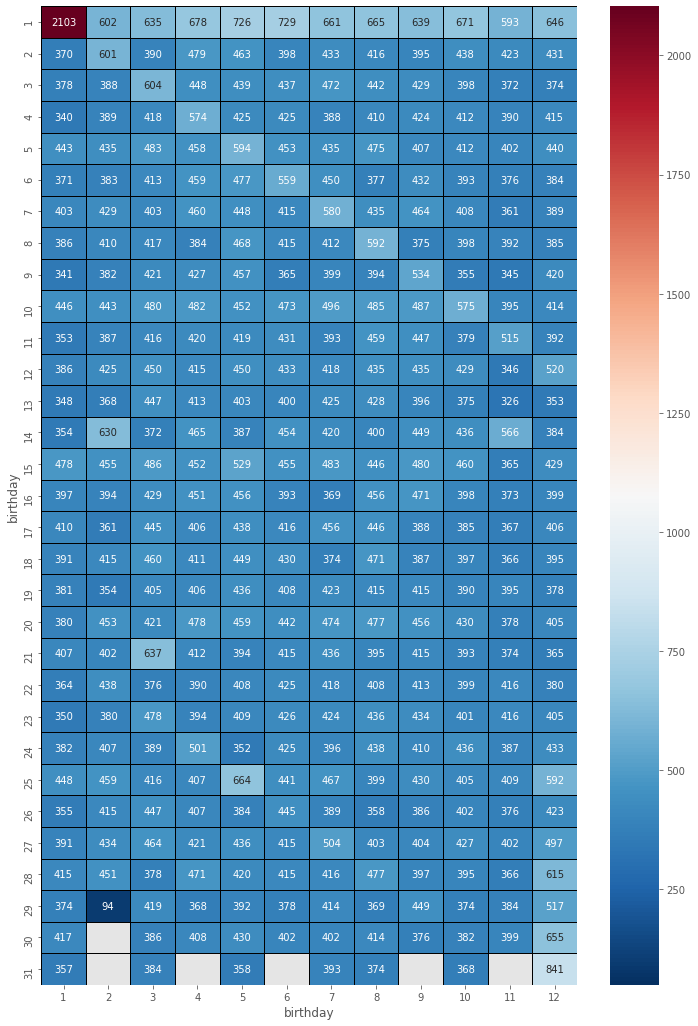

In [243]:
fig,ax=plt.subplots(figsize=(12,18))
sns.heatmap(dat,cmap="RdBu_r",vmin=50,annot=True,fmt=".0f",linewidths=1,linecolor="black")

In [ ]:
# ddata=newd[["religion","birthday","gender","lang","first"]]
# ddata.count()

In [ ]:
# ddata.to_csv("modifiedJO.csv",index=False)

In [ ]:
# dates.to_csv("dates.csv",index=False)